# 0. Od prowadzacego

Jesli sprobujemy zmaksymalizowac w.T(x_dod - x_uje) optymalizowanie tego jest bez sensu bo po prostu zwrociloby w.t = inf. Wiec trzeba dodac warunki. ||W|| = 1 i jak dodamy 1/||w||w.T(x_dod - x_uje) to juz bedzie znormalizowane i bedzie miało postac: 
w.T(x_dod - x_uje)*(1/||w||). To co maksymalizujemy to jest 2/||w|| to jest to samo co minimalizacja 1/2 ||W||. Mozemy dac dwa warunki ale lepiej uproscic: yi*(w.T*Xi + b) = 1 ale zeby podstawic pod Lagrangian:
yi*(w.T*Xi + b) - 1 = 0. Ostatni manewr to zastapienie dlugosci wektora zeby minimalizowac kwadrat dlugosci. 

funkcja kosztu zalezy od biasu 
L (w,b) = 1/2 w.T*w - suma po i lamda_i [y_i(w.T*x_i + b) - 1] wzor jest ciezki po dostawiamy tyle warunkow ile jest probek bo dla kazdej probki jest inna lambda plus do tego lambda musi byc nieujmena czyli wieksza lub rowna zero. To nie jest problem jednokierunkowy. Potrzebujemy zminimalizowac L(w,b, lambda) zminimalziwoac wzgledem wag i biasow ale maksymalizowac wzgledem lambdy. Zwykle nie da wynikow, numerycznie sie nie uda. Ale jest cos co pozwala zamienic na problem dualny. Mamy wtedy funkcje nagrody: R(lambda) = suma po i lambda_i - 1/2 suma po i suma po j lambda_i _lambda_j y_i y_j x_i.T x_j i ten wzor maksyamlizujemy juz tylko wzgledem lambdy wciaz lambda nieujmena musi byc i drugi warunek: suma po i lambda_i*y_i = 0. Nigdzie tu nie mamy wag. A wagi by sie przydaly. Wagi liczymy z suma po i lambda_i * y_i * x_i. Lambdy wzielismy z dudalnego i mozemy liczyc wagi. Jak mam juz dualna to mam juz maksymalny margines. W procesie maksyamlizacji wyjdzie kilka lambd niezerowych i to sa te lambdy na krawedzi. Wiec to zonacza ze wagi licze tylko dla tych lambd ktore sa niezerowe. Wiec ostateczny wagi liczymy w = suma po i lambda*_i y_*_i X.T*_i i dzieki unmpy mozna obliczyc Lambda  * product hadamarda (mnozeie per element) *y) X.T wiec numpyowo napiszemy (lambda * y) @ X.T. Jak mam nauczony model to predykcja to jest znak wiec y = sign (w.T*x + b).Te punkty z gwiazdka dla ktorych lambd anie jest zerowa punkty nosne. Tylko to co jest wyzej to jest svm liniowy jak sprobuje odpali cna make moons to on sobie nie poradzi. 

Najlepiej przejsc od razu do wzoru 6 czyli tego z kernelem bo chyba podstawienie liniowej zaleznosci daje wzor 5.
Jesli mamy hiperparamtertry to trzeba przeszukac i greed search.  JEst troche nieistotnych kolumn, normalizacja wartosci. Standaryzowac tylko rozklad normalny czyli po prostu dac normalizacja. Przemyślec ostatnie pytanie mocniej. Czy klasyfikator myli sie w sposob akcpetowlny czy nieakcpetowalny co jest bardziej kosztowne. 

Da sie stworzyc nieliniowego svm bo poprzednio byl omawiany prosty liniowy czyli prawie bezuzyteczny. 

Slack variables pozwalaja na dopuszczenie pewnej niedokladnosci w modelu. Zanim przesuniemy margines chcemy miecm ozliwosc pomylenia sie kilka razy. 

Rozluznic ograniczenie :  
y_i(w.T*x_i + b) = 1
y_i(w.T*x_i+b) = 1 - {greckie ksi_i} ale pozwalamy sie mylic tylko w jedna strone dlatego dajemy ze ksi_i >=0

a drugie ograniczenie zeby ustawic nasza tolerancje to suma po i ksi_i <= mniejsze od zalozonego bledu 

L(w, ksi) = 1/2 w.T*w + c*suma po i ksi_i (c to jakis mnoznik)
L(w, ksi_i, lambda, u) = 1/2*w.T*w + c*sumapo i ksi i - suma po i lambda_i [y_i(w.T*x_i+b) - (1-ksi_i)] - suma po i u_i *ksi_i
czyli chcemy minimalizowac w oraz ksi_i a maksymalizowac lambda oraz uale ta forma jest ciezka bo chcemy maksymalizowac dla 2 i minimalizowac dla 2 
wiec przyjmujemy ze lambda_i = c - u_i, w ten sposob pozbylismy sie u_i
wiec maksymalizujemy R(lambda) = suma po i lambda_i - 1/2 suma po i suma po j lambda_i*lambda_j*y_i*y_j*x_i.T*x_j
wiec tu sie nie zmienilo ale zmienily sie warunki tzn to dziala pod warunkiem ze 
suma po i lambda_i*y_i = 0 a nowy warunek to ograniczenie gorne lambdy: 0<= lambda_i <=c
jesli jestesmy od 0 < lambda < c wtedy ksi_i jest na brzegu i to sa nasze punkty nosne i na nich opiera sie klasyfikatora
jesli lambda = C to ksi_i jest wewnatrz marginesu  a to sa te ktore sa outlierami wiec takim trzeba sie przygladac 
jesli lambda = 0 to daleko brzegu, nie maja znaczenia bo sa daleko bezpiecznie zaklsyfikowane 

zazwyczaj jak sie podkreca parametry to klasyfikator agresywniejszy tutaj odwrotnie im mniejsze C tym bardziej agresywny 

czym jest ksi_i to jest tolerancja bledu

metoda wspolczynnikow lagrangea

To co wyzej to nadal tylko proste linie 

Wiec teraz wisienka na torcie
My rysujemy linie prostowo w wysoko wymiarowej przestrzeni i jak wrocimy to sie okazuje ze to juz nie jest linia prost. Wiec zmieniamy bardziej wszechswiat. Tylko ze podnoszac wymiarowosc zwiekszamy zlozonosc obliczeniowa. Wiec chcemy znalezc linie prosta bez wchodzenia w wysoko wymiarowosc. 
Wwe wzorze nagrody lambda mamy tam skladowa podobienstwa bo mamy x_i.T*x_j to wtedy mamy iloczyn kartezjanski ale wypwoadzamy sobie funkcje jadra ktora okresla podobienstwo miedzy A oraz B. Bo mozna okresli cpodobienstwo w tej wymiarowosci ale nie wchodzac w wysoko wymiarowosc. Czyli mierzymy odlegglosc bez przechodznia do wysokiej przestrzeni i na tym polega trick. 

Dopisac loss
wyliczyc sobie b w funkcji transform, podstawiamy punkty nosne i wtedy wyliczamy b bo transofrm wyliczy z tego wzoru co jest sign 

wagi zalezy od funkcji jadra 

# 0.0 Basic Concept, Maximal Margin Classifier  

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.  

* Still effective in cases where number of dimensions is greater than the number of samples.  

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.  

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.  

**The disadvantages of support vector machines include:**

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

Maximal Margin Classifiers are super sensitive to outliers in the training data.   
![Bias Tradeoff Example](BiasTradeoff.JPG)    

# 0.1 Soft Margin  
![Soft Margin](SoftMargin.JPG)  

We use Cross Validation to determine how many misclassifications and obseravtions to allow inside of the Soft Margin to get the best classification. 
The name Supported Vector Classifier comes from the fact that the observations on the edge and within the Soft Margin are called Support Vectors.   

# 0.2 Supported Vector Classifier    
![Support Vectors](SupportVectors.JPG)  

But Supported Vector Classifier can't hadnel problem like this below:  

![Misclassifications](Misclassifications.JPG)  

And that's why we need Supported Vector Machines

# 0.3 Supported Vector Machines
![Supported Vector Machines](SupportedVectorMachines.JPG)  

# 0.4 Polynomial Kernel
![Polynomial kernel](PolynomialKernel.JPG)   
'a' and 'b' refer to two different observations in the dataset. 'r' determines the coefficient of the polynomial 

How a Kernel Function systematically finds Support Vector Classifiers in higher dimensions  

If we use Polynomial Kernel, which has a parameter d, which stands for the degree of the polynomial. When d = 1 the Polynomial Kernel computes
the relationships between each pair of observations in 1-Dimension and this realtionships are used to find a Support Bector Classifier   

![Polynomial Kernel 2-Dim](PolynomialKernel2Dim.JPG)

Last but not least we can find good value for 'r' and 'd' with cross validation.

![Polynomial Kernel 2-Dim](PolynomialKernel2.JPG)  
![Polynomial Kernel 2-Dim](PolynomialKernel3.JPG)  

Kernel functions only calculate the relationships between every pair of points as if they are in the higher dimensions - they don't
actually do the transformation and it's called **Kernel Trick**

# 0.5 Generate of dataset

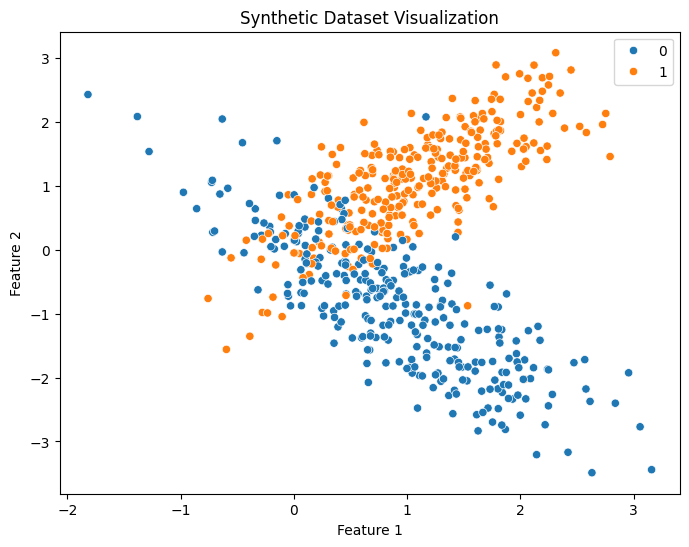

(array([[0.8687836 , 0.8458348 ],
        [0.70852214, 0.71680607],
        [0.63184081, 0.63786494],
        [1.        , 0.00713043],
        [0.57137078, 0.59365177],
        [0.64724682, 0.39166387],
        [0.59314163, 0.5158    ],
        [0.76817506, 0.71198705],
        [0.73929881, 0.71205187],
        [0.7785747 , 0.73713189],
        [0.76954208, 0.09852467],
        [0.75330261, 0.77559518],
        [0.73834859, 0.26750557],
        [0.70124584, 0.2817533 ],
        [0.58787769, 0.62189915],
        [0.68945409, 0.7427068 ],
        [0.75165943, 0.35014697],
        [0.76997243, 0.76733537],
        [0.84727834, 0.0424869 ],
        [0.69099892, 0.37351253],
        [0.75470773, 0.64725479],
        [0.76771441, 0.1365494 ],
        [0.67909218, 0.24814388],
        [0.61985353, 0.69952959],
        [0.58684354, 0.62139883],
        [0.62939279, 0.49171414],
        [0.53438106, 0.42381815],
        [0.71301673, 0.23047867],
        [0.59438389, 0.45252729],
        [0.672

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

RANDOM_STATE = 254687
N_SAMPLES = 587
N_FEATURES = 2
N_CLASSES = 2

class SyntheticDataset:
    """A class to generate and preprocess synthetic datasets for classification task."""

    def __init__(self, random_state: int, n_samples: int, n_features: int, n_classes: int):
        """
        Initialize the SyntheticDataset class.

        :param random_state: Seed for random number generation.
        :param n_samples: Number of samples to generate.
        :param n_features: Number of features for the dataset.
        :param n_classess: Number of classes for the target variable.
        """
        self.random_state = random_state
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes 
        self.X = None
        self.y = None
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None


    def generate_make_classification(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_classification
        
        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_classification(
            n_samples=self.n_samples,
            n_features=self.n_features,
            n_informative=self.n_features,
            n_redundant=0,
            n_clusters_per_class=1, # single-mod means one cluster per class
            random_state=self.random_state
        )
        return self.X, self.y
    
    def generate_make_moons(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_mmons

        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_moons(
            n_samples=self.n_samples,
            random_state=self.random_state,
        )
        return self.X, self.y

    def normalize(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Normalize the feature matrix (X) and target vector(y) to the range [0,1].

        :return: A tuple containing the normalized feature matrix (X) and target vector (y)
 
        Note: 
        Remmber to fit only on training dataset so it means that I use min and max scaler on training dataset and
        then aplly this boudaries for test dataset. 
               """
        if self.X_train is not None and self.X_test is not None:
            min_x, max_x = self.X_train.min(), self.X_train.max() # Min, max taking only from training dataset
            self.X_train = (self.X_train - min_x) / (max_x - min_x)
            self.X_test = (self.X_test - min_x) / (max_x - min_x)

        return self.X_train, self.X_test 


    def visualize(self): 
        """ Visualize the dataset using a scatter plot"""
        if self.X is not None and self.y is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X[:,0], y=self.X[:,1], hue=self.y)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")


    
    def splitting(self) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Function for splitting datasets into training and test"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=RANDOM_STATE)
        return self.X_train, self.X_test, self.y_train, self.y_test

    
dataset = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
dataset.generate_make_classification() 
dataset.visualize()

# Dividing dataset on a trening set and test set 
dataset.splitting()

# Normalization of datasets 
dataset.normalize()


# 0.6 Implementation of analyzes

In [50]:
class ResultsAnalyzes:
    """ 
    A class to analyze and visualize the results of a binary classification model.

    Parameters:
        target (np.ndarray): The true labels.
        prediction (np.ndarray): The predicted labels.
    """

    def __init__(self, target: np.ndarray, prediction: np.ndarray):
        self.target = target
        self.prediction = prediction
        self._accuracy = None # Private atribute
        self._sensitivity = None
        self._specificity = None
        self._precision = None
        self._false_match_rate = None
        self._false_non_match_rate = None

    def confusion_matrix(self):
        """ Compute and plot the confusion matrix """
        cm = confusion_matrix(self.target, self.prediction)

        # Plot the confusion matrix using Seaborn
        plt.figure(figsize=(6,4))
        sns.heatmap(
            cm, 
            annot=True, # Displays the value in each cell
            fmt="d", # Format the values as integers
            cmap="Blues", # uses a blue color palette 
            cbar=False, # Hide the color bar
            xticklabels=["Predcited 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"]
        )
        
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion matrix")
        plt.show()

    @property 
    def accuracy(self) -> float:
        """ 
        Compute the accuracy of the predictions.
        
        Notes:
            Tells how many samples were well classified from all samples
        """
        return accuracy_score(self.target, self.prediction) 

    @property
    def sensitivity(self) -> float: 
        """ 
        Compute the sensivitty (recall) of the predictions. Sensitivity (Recall) = TP / (TP + FN) 
        
        Notes:
            Tell how many samples were predicted as True Positive from all Acutal Positive
        """
        
        return recall_score(self.target, self.prediction)

    @property
    def specificity(self) -> float: 
        """
        Compute the specificity of the predictions.  Specificity = TN / (TN + FP)

        Notes:
            Tell how many samples were predicted as True Negatives from all Acutal Negative
        """
        
        cm = confusion_matrix(self.target, self.prediction)
        self.tn, self.fp, self.fn, self.tp = cm.ravel() # ravel function in numpy is used to faltten a multi-dimensional array into a 1-dimensional array. It returns a contiguous flattened array, meaning it 
        # collapses the array into a single dimension while maintaining the order of the elements 
        specificity = self.tn / (self.tn + self.fp)
        return specificity
    
    @property
    def balanced_accuracy(self) -> float:
        """
        Compute class imbalance by giving equal weight to both classes.

        Notes:  
         Useful when:
        - Model detects one class better than the other
        - Dataset has unequal class distribution

        !!!! high BA doesn't reveal if the model beats majority-class guessing
        example: in a 90% majority classs, BA = 0.9 could mean the model just predicts the majority that's why we need J score

        **Interpretation:**  
        - 1 = Perfect classifier  
        - 0.5 = Random guessing  
        
        """
        return (self.sensitivity + self.specificity) / 2
    
    @property
    def j_score(self) -> float:
        """
        Measures how much better the model is than random chance. Penalizes models that rely on class imbalance. 

        Notes:
        baseline = 0 means no better than guessing
        J = 0.6 means the model is 60% better than random
        J = -1 means always wrong
        J = 1 means perfect
        """
        return self.sensitivity + self.specificity - 1
    

    @property
    def f1_score(self) -> float:
        """
        Is a critical metric for evaluating classification models, especially when dealing with imbalanced datasets. 
        Penalizes models that ignore the minority class
        Use case: 
        Ideal for fraud detecion, disease screening:
        * In fraud detection: it answers: "Are we catching enough fraud without overwhelming our team?
        * In disease screening "Are we diagnosing patients early without causing unnecessary panic?
        """
        return f1_score(self.target, self.prediction)
    

    @property
    def false_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking an impostor for a legitimate user.
        
        Notes:
        Lower FMR → Stricter system (fewer impostors accepted, but more legitimate users rejected).
        A bank vault prioritizes low FMR (avoid impostors) → High FNMR is tolerated (owners may retry).
        """
        return self.fp / (self.fp + self.tn)
    

    @property
    def false_non_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking a legitimate user for an impostor. \
        
        Notes:
        A office door prioritizes low FNMR (avoid frustrating employees) → Higher FMR risk.       
        """
        return self.fn / (self.fn + self.tp)
    

    def show_results(self):
        """ Display the accuracy, sensitivity and specificity of the predictions"""
        #self.accuracy = self._accuracy()
        #self.sensitivity = self._sensitivity()
        #self.specificity = self._specificity()
        print(f"Accuracy: {self.accuracy:.2f}, Sensivity: {self.sensitivity:.2f}, Specifity: {self.specificity:.2f}")

    
    def plot_ROC_curve(self, y_prediction_probability: np.ndarray):
        """
        Plot the Receiver Operaint Characteristic (ROC) curve.
        
        Parameters:
            y_prediction_probability (np.ndarray): The predicted probabilities for the positive class.
        """
        # Compute ORC curve and AUC
        fpr, tpr, thresholds = roc_curve(self.target, y_prediction_probability) # stands for False Positive Rate (1 - Specificity)  and True Positive Rate (Sensitivity)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC cruve (AUC = {roc_auc:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characterstics Curve")
        plt.legend(loc="lower right")
        plt.show()

        def plot_decision_boundary(self, X: np.ndarray, y: np.ndarray):
            """
            Plot the decision boundary for a trained model.
            
            Parameters:
                X (np.ndarray): The feature matrix of shape (n_samples,n_features)
                y (np.ndarray): The target vector of shape (n_samples,).
            """

            if X.shape[1] != 2:
                raise ValueError("Decision boundary plotting is only supported for 2D feature spaces.")
            
            # Create a grid of points covering the feature space
            x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 # Frist feature
            y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 # Second feature

$${Prize Function: } \quad
\sum_{i} \lambda_i - \frac{1}{2} \sum_{i} \sum_{j} \lambda_i \lambda_j y_i y_j x_i^\top x_j$$


$\sum_{i} \lambda_i$ : This is the sum of the Lagrange multipliers $\lambda_i$ which represents the weights assigned to each training sample

# 1.0 Implementation of SVM

In [51]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_predict

# Constants 
DEFAULT_C = 1.0

class OwnSVM():
    """
    Custom Support Vector Machine implementation with dual problem formulation.
    
    Parameters:
    C: float, default=1.0
        Regularization parameter. The strength of the regularization inversely proportional to C. 
    kernel: str or callable, default="linear"
        Specifies the kernel type to be use in the algorithm. If string, must be one of:
        "linear", "poly", "rbf". If callable, must take two arrays and return a kernel matrix.
    max_iter: int, default=1000
        Maximum number of iterations for the optimization solver.
    tol: float, default=1e-4
        Tolerance for stopping criterion. 
    random_state: int, default=254687
        Seed for random number generation.
    """

    
    def __init__(self, C: float = DEFAULT_C, kernel: str = "linear", 
                max_iter: int = 1000, tol: float = 1e-4, random_state: int = RANDOM_STATE,
                degree: int = 3, gamma: float = 1.0, coef0: float = 1.0):
        self.C = C
        self.kernel = kernel
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.rng = np.random.RandomState(random_state)
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        


    def _linear_kernel(self, X1: np.ndarray, X2: np.ndarray) -> np.ndarray:
        """Computes linear kernel between X1 and X2"""
        return X1 @ X2.T
    

    def _rbf_kernel(self, X1: np.ndarray, X2: np.ndarray, gamma: float = 0.1) -> np.ndarray:
        """Compute RBF (Gaussian) kernel between X1 and X2"""
        sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
        return np.exp(-gamma * sq_dists)
    

    def _poly_kernel(self, X1: np.ndarray, X2: np.ndarray, degree: int = 3, gamma: float = 1.0, coef0: float = 1.0) -> np.ndarray:
        """ Computer polynomial kernel between X1 and X2"""
        return (gamma * (X1 @ X2.T) + coef0) ** degree

    def _get_kernel_fn(self) -> callable:
        """Return the appropriate kernel function based on initialization"""
        if callable(self.kernel):
            return self.kernel
        elif self.kernel == "linear":
            return self._linear_kernel
        elif self.kernel == "rbf":
            return lambda X1, X2: self._rbf_kernel(X1, X2)
        elif self.kernel == "poly":
            return lambda X1, X2: self._poly_kernel(X1, X2, degree=self.degree, gamma=self.gamma, coef0=self.coef0)
        else:
            raise ValueError(f"Unsporrted kernel: {self.kernel}")


    def _dual_objective(self, alpha: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
        """
        Compute the dual SVM objective function to be minimized.
        
        Parameters:
        alpha: np.ndarray
            Lagrange multipliers (dual variables)
        X: np.ndarray
            Training data
        y: np.ndarray
            Target labels (-1 or 1)

        Returns:
        float
            Value of the dual objective function
        """
        yyT = np.outer(y, y)
        self.K = self.kernel_fn(X, X)
        return 0.5 * alpha @ (yyT * self.K) @ alpha - np.sum(alpha)
    
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'OwnSVM':
        """
        Fit the SVM Model according to the given training data.

        Parameters:
        X: np.ndarray of shape (n_samples, n_features)
            Training vectors
        y: np.ndarray of shape (n_samples)
            Target values (binary -1 or 1)
        
        Returns:
        self
            Fitted estimator.
        """
        y[y==0] = -1 # Convert 0/1 labels to -1 to +1 if needed 
        self.kernel_fn = self._get_kernel_fn()
        
        # Constraints for the optimization problem:
        # 1. Sum(alpha_i * y_i) = 0
        # 2. 0 <= alpha_i <= C for all i
        constraints = (
            {'type': 'eq', 'fun': lambda alpha: np.sum(alpha * y)},
            {'type': 'ineq', 'fun': lambda alpha: alpha}, 
            {'type': 'ineq', 'fun': lambda alpha: self.C - alpha}
        )
        
        # Initial point
        #alpha0 = self.rng.normal(0, self.C, size=X.shape[0])
        alpha0 = np.zeros(X.shape[0])

        # Solve the dual optimization problem
        result = minimize(
            fun=lambda alpha: self._dual_objective(alpha, X, y),
            x0=alpha0,
            method="SLSQP",
            constraints=constraints,
            options={'maxiter': self.max_iter, "ftol": self.tol}
        )

        if not result.success:
            raise ValueError(f"Optimization failed: {result.message}")
        
        self.alpha = result.x
        self.X_train = X
        self.y_train = y

        # Find support vectors (alpha > 0)
        sv_mask = self.alpha > 1e-5
        self.support_vectors_ = X[sv_mask]
        self.support_vectors_labels_ = y[sv_mask]
        self.support_vectors_alphas_ = self.alpha[sv_mask]

        # Calculate bias (intercept)
        if len(self.support_vectors_alphas_) > 0:
            K_sv = self.kernel_fn(self.support_vectors_, self.support_vectors_)
            self.bias_ = np.mean(
                self.support_vectors_labels_-
                np.sum(
                    self.support_vectors_alphas_ * self.support_vectors_labels_ * K_sv, axis=1
                )
            )
        else:
            self.bias_ = 0

        return self
    

    def decision_function(self, X: np.ndarray) -> np.ndarray:
        """
        Compute the decision function for the samples in X.

        Parameters:
        X: np.ndarray of shape (n_samples, n_features)
            Input samples.
    
        Returns:
        np.ndarray of shape (n_samples,)
            Decision function values.
        """

        K = self.kernel_fn(X, self.support_vectors_)
        return np.sum(
            self.support_vectors_alphas_ * self.support_vectors_labels_ * K,
            axis=1
        ) + self.bias_
    

    def predict(self, X:np.ndarray) -> np.ndarray:
        """
        Predict class labels for samples in X.
        
        Parameters:
        X: np.ndarray of shape (n_samples, n_features)
            Input samples
        
        Returns:
        np.ndarray of shape (n_samples,)
            Predicted class labels (-1 or 1)
        """
        return np.sign(self.decision_function(X))
    
    # def predict_proba(self, X: np.ndarray) -> np.ndarray:
    #     """
    #     Predict class probabilities using Plat scalling. 

    #     Parameters:
    #     X: np.ndarray of shape (n_samples, n_features)
    #         Input sampples
        
    #     Returns:
    #     np.ndarray of shape (n_samples, 2)
    #         Class probabiblities (P(y=-1), P(y=+1))
    #     """
    #     if not hasattr(self, 'platt_scaler'): # Checking whether object has an atribute with given name
    #         raise RuntimeError("Must call fit_plat_scaling() before predict_proba()")
        
    #     decision_values = self.decision_function(X)
    #     prob_positive = self.platt_scaller.predict_proba(decision_values.reshape(-1, 1))[:,1]
    #     return np.vstack([[1 - prob_positive], prob_positive]).T
    
    # def fit_platt_scaling(self, X: np.ndarray, y: np.ndarray, cv: int = 3) -> None:
    #     """
    #     Fit platt scaling to convert decision values to probabilies

    #     Parameters:
    #     X: np.ndarray
    #         Training data
    #     y: np.ndarray
    #         Target labels (-1 or 1)
    #     cv: int
    #         Number of cross-validation folds
    #     """
    #     # Getting cross-validated decision values
    #     dec_values = cross_val_predict(
    #         self.__class__(**self.get_params()),
    #         X,
    #         y,
    #         method='decision_function',
    #         cv=cv
    #     )

    #     # Traing logistic regression on decision values 

## 1.1. Own SVM results make_classification

Fitting of model of own SVM took 22.71s
Accuracy: 0.84, Sensivity: 0.78, Specifity: 0.92


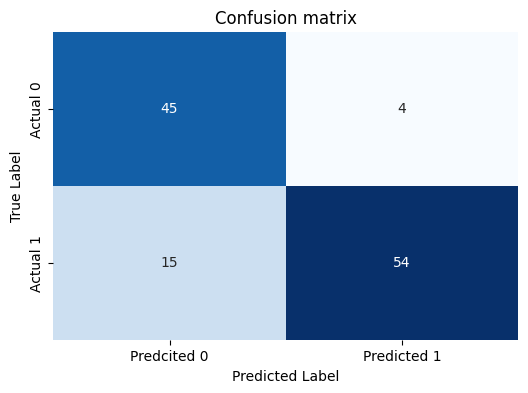

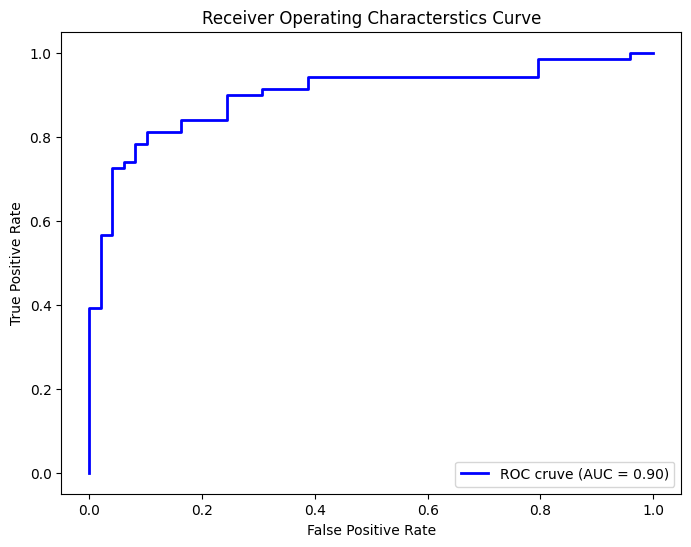

In [52]:
# Converting to binary output
dataset.y_train[dataset.y_train == 0] = -1
dataset.y_test[dataset.y_test == 0] = -1  

# Initlizing own SVM
svm = OwnSVM(C=1.0, kernel="linear")

# Computing time 
start_time = time.time()

# for _ in range(100):

svm.fit(dataset.X_train, dataset.y_train)

end_time = time.time()
elapsed_time = end_time-start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")

y_pred = svm.predict(dataset.X_test)
y_score = svm.decision_function(dataset.X_test)
fpr, tpr, thresholds = roc_curve(dataset.y_test, y_score)

# Results for own 
analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)

## 1.2 Sklearn SVM results make_classification

Fitting sklearn SVM model took 0.76s
Accuracy: 0.82, Sensivity: 0.75, Specifity: 0.92


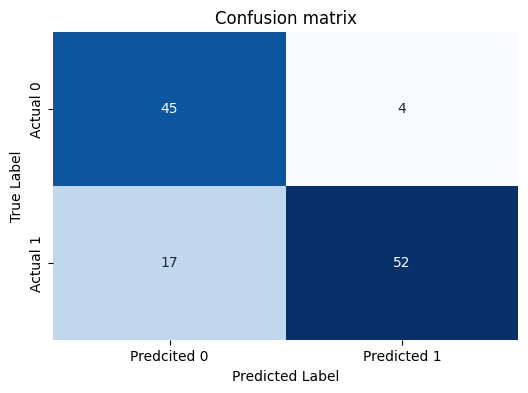

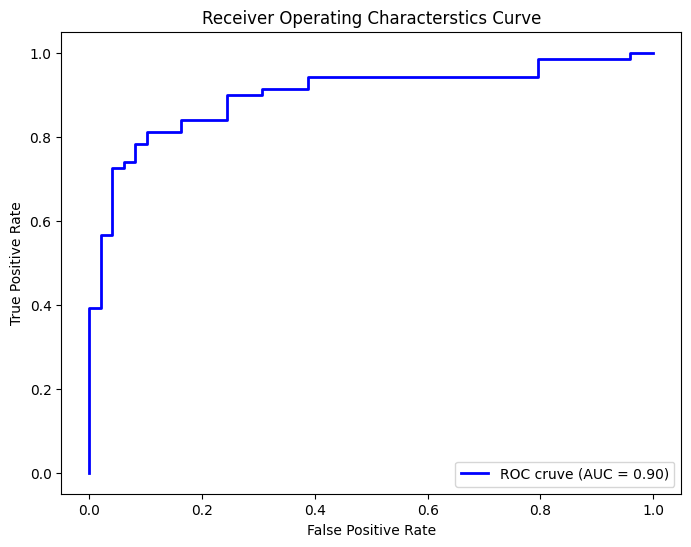

In [53]:
from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

# clf = make_pipeline(SVC(kernel="linear"))
clf = SVC(kernel='linear', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    clf.fit(dataset.X_train, dataset.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = clf.predict(dataset.X_test)
y_score = clf.predict_proba(dataset.X_test)[:,1]


linear_sklearn_analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
linear_sklearn_analyzer.show_results()
linear_sklearn_analyzer.confusion_matrix()
linear_sklearn_analyzer.plot_ROC_curve(y_score)

## 1.3. Own SVM results make_moons

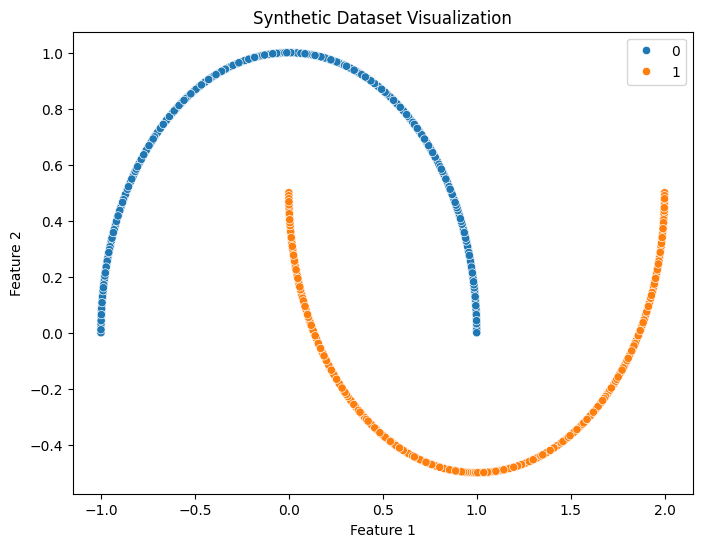

Fitting of model of own SVM took 20.13s
Accuracy: 0.91, Sensivity: 0.95, Specifity: 0.87


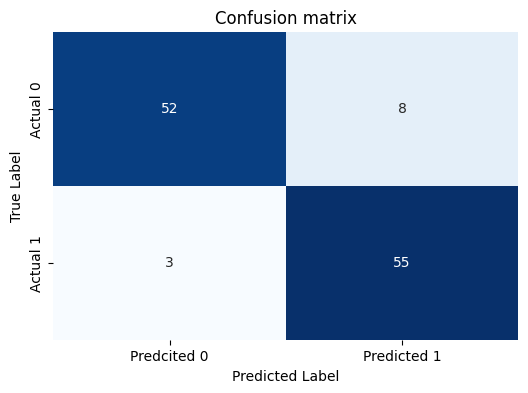

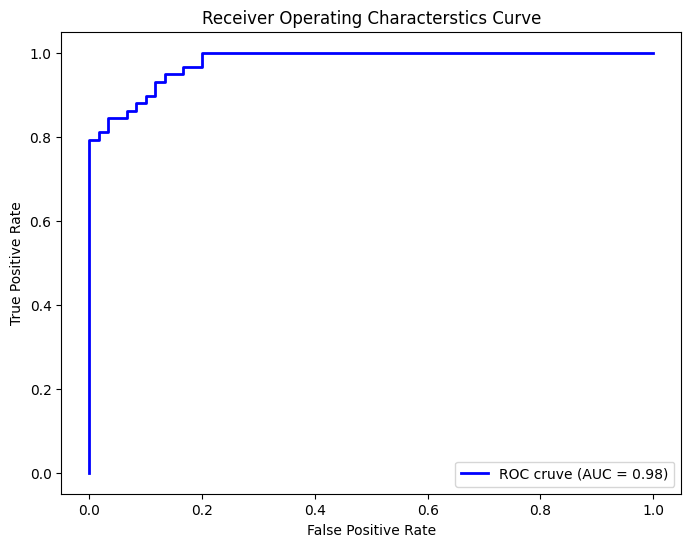

In [54]:
dataset_moons = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
dataset_moons.generate_make_moons() 
dataset_moons.visualize()

# Dividing dataset on a trening set and test set 
dataset_moons.splitting()

# Normalization of datasets 
dataset_moons.normalize()

# Converting to binary output
dataset_moons.y_train[dataset_moons.y_train == 0] = -1
dataset_moons.y_test[dataset_moons.y_test == 0] = -1  

# Initlizing own SVM
svm = OwnSVM(C=1.0, kernel="linear")

# Computing time 
start_time = time.time()

# for _ in range(100):

svm.fit(dataset_moons.X_train, dataset_moons.y_train)

end_time = time.time()
elapsed_time = end_time-start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")

y_pred = svm.predict(dataset_moons.X_test)
y_score = svm.decision_function(dataset_moons.X_test)
fpr, tpr, thresholds = roc_curve(dataset_moons.y_test, y_score)

# Results for own 
analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)

## 1.4. Sklearn SVM results make_moons

Fitting sklearn SVM model took 0.71s
Accuracy: 0.91, Sensivity: 0.95, Specifity: 0.87


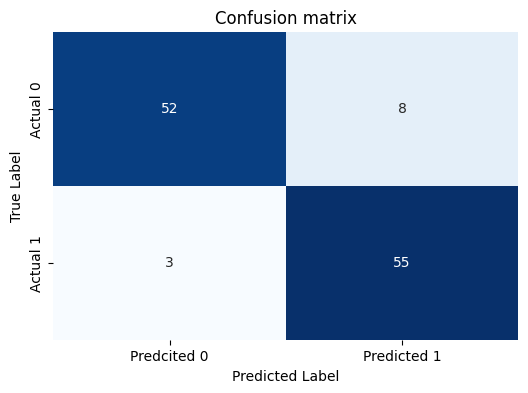

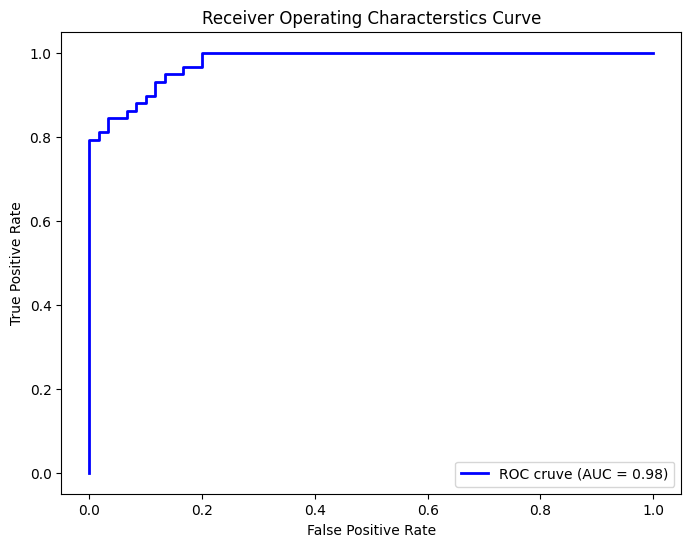

In [55]:
clf = SVC(kernel='linear', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    clf.fit(dataset_moons.X_train, dataset_moons.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = clf.predict(dataset_moons.X_test)
y_score = clf.predict_proba(dataset_moons.X_test)[:,1]


linear_sklearn_analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
linear_sklearn_analyzer.show_results()
linear_sklearn_analyzer.confusion_matrix()
linear_sklearn_analyzer.plot_ROC_curve(y_score)

# 2.0 Radial SVM

## 2.1 Own radial SVM results make_classification

Fitting of model of own SVM took 60.43s
Accuracy: 0.83, Sensivity: 0.77, Specifity: 0.92


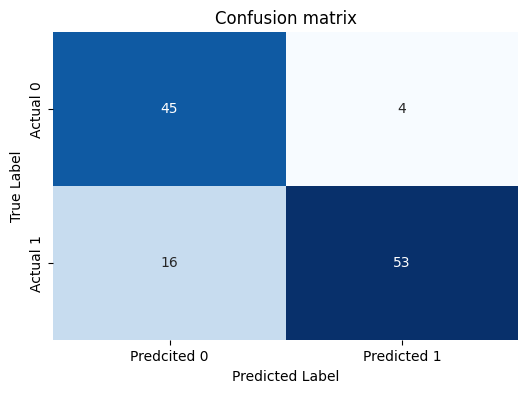

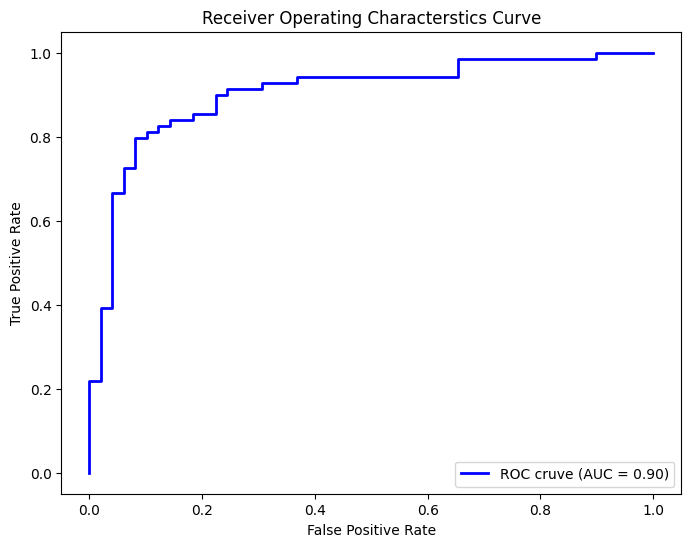

In [56]:
radial_svm = OwnSVM(C=1.0, kernel="rbf")

# Computing time
start_time = time.time()
# for _ in range(100):
radial_svm.fit(dataset.X_train, dataset.y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")
y_pred = radial_svm.predict(dataset.X_test)
y_score = radial_svm.decision_function(dataset.X_test)
fpr, tpr, thresholds = roc_curve(dataset.y_test, y_score)

radial_analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
radial_analyzer.show_results()
radial_analyzer.confusion_matrix()
radial_analyzer.plot_ROC_curve(y_score)

## 2.2 Sklearn SVM rbf results make_classification

Fitting sklearn SVM model took 1.07s
Accuracy: 0.88, Sensivity: 0.81, Specifity: 0.98


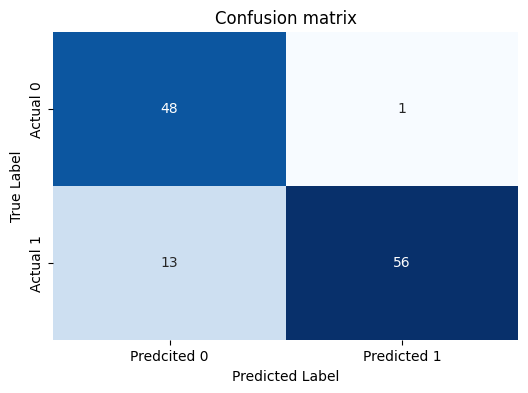

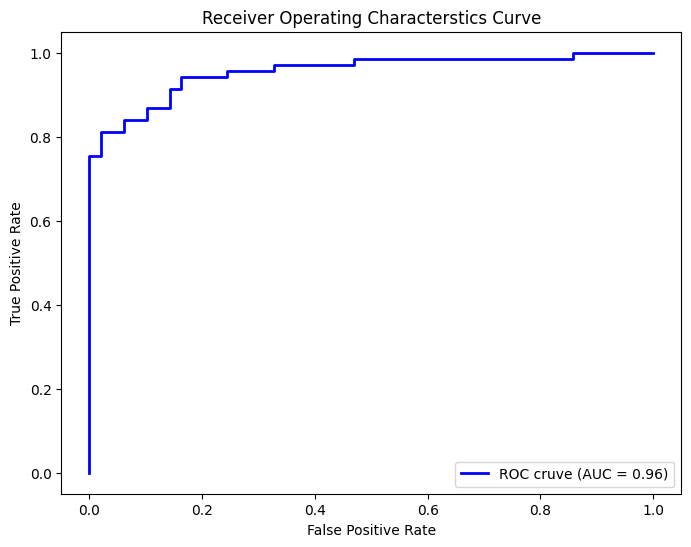

In [57]:
radial_clf = SVC(kernel='rbf', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    radial_clf.fit(dataset.X_train, dataset.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = radial_clf.predict(dataset.X_test)
y_score = radial_clf.predict_proba(dataset.X_test)[:,1]


analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)

## 2.3 Own radial SVM results make_moons

Fitting of model of own SVM took 67.79s
Accuracy: 0.87, Sensivity: 0.90, Specifity: 0.85


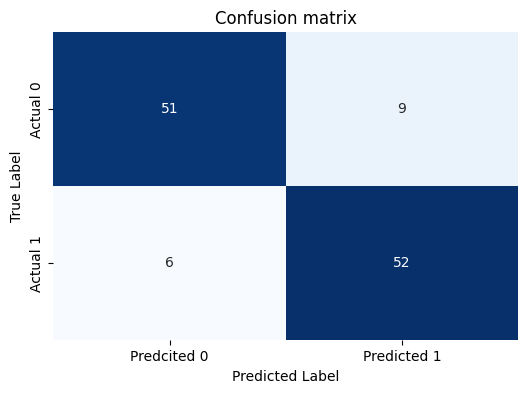

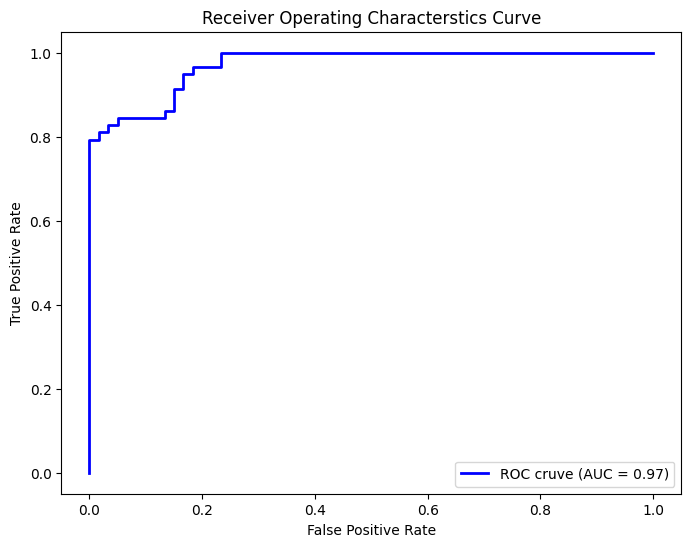

In [58]:
radial_svm = OwnSVM(C=1.0, kernel="rbf")

# Computing time
start_time = time.time()
# for _ in range(100):
radial_svm.fit(dataset_moons.X_train, dataset_moons.y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")
y_pred = radial_svm.predict(dataset_moons.X_test)
y_score = radial_svm.decision_function(dataset_moons.X_test)
fpr, tpr, thresholds = roc_curve(dataset_moons.y_test, y_score)

radial_analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
radial_analyzer.show_results()
radial_analyzer.confusion_matrix()
radial_analyzer.plot_ROC_curve(y_score)

## 2.4 Sklearn SVM rbf results make_moons

Fitting sklearn SVM model took 0.90s
Accuracy: 1.00, Sensivity: 1.00, Specifity: 1.00


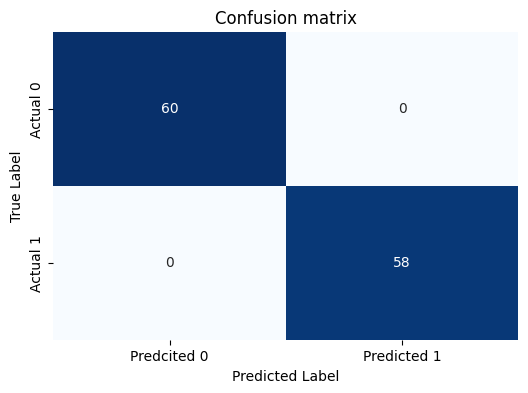

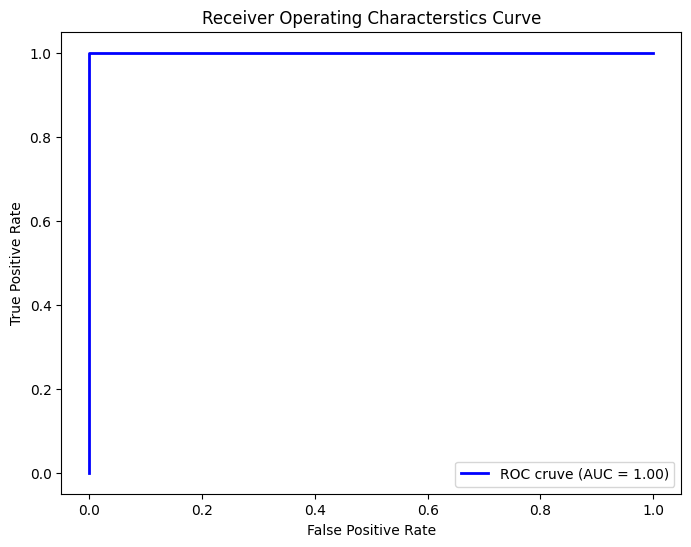

In [59]:
radial_clf = SVC(kernel='rbf', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    radial_clf.fit(dataset_moons.X_train, dataset_moons.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = radial_clf.predict(dataset_moons.X_test)
y_score = radial_clf.predict_proba(dataset_moons.X_test)[:,1]


analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)

# 3.0 Poly SVM

## 3.1 Own poly SVM results make_classification

Fitting of model of own SVM took 72.62s
Accuracy: 0.84, Sensivity: 0.78, Specifity: 0.92


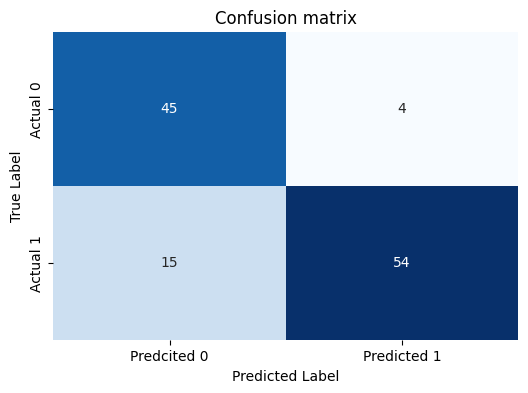

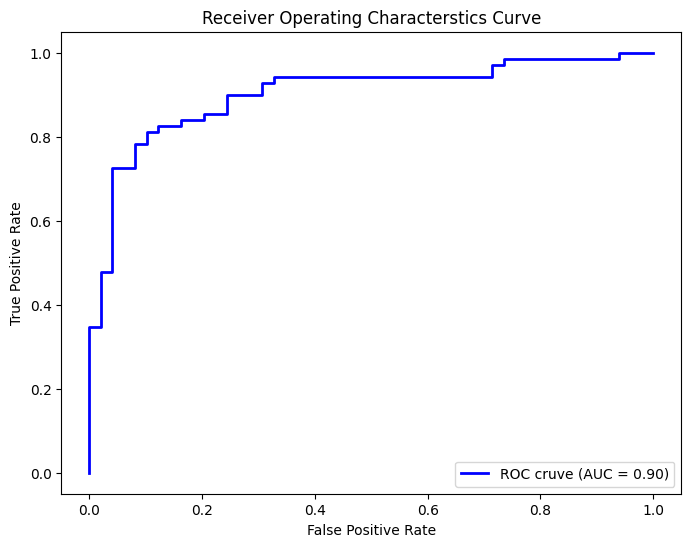

In [60]:
poly_svm = OwnSVM(kernel='poly', degree=3, gamma=0.1, coef0=1)

# Computing time
start_time = time.time()
# for _ in range(100):
poly_svm.fit(dataset.X_train, dataset.y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")
y_pred = poly_svm.predict(dataset.X_test)
y_score = poly_svm.decision_function(dataset.X_test)
fpr, tpr, thresholds = roc_curve(dataset.y_test, y_score)

poly_analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
poly_analyzer.show_results()
poly_analyzer.confusion_matrix()
poly_analyzer.plot_ROC_curve(y_score)

## 3.2 Sklearn poly SVM results make_classification

Fitting sklearn SVM model took 4.14s
Accuracy: 0.87, Sensivity: 0.80, Specifity: 0.98


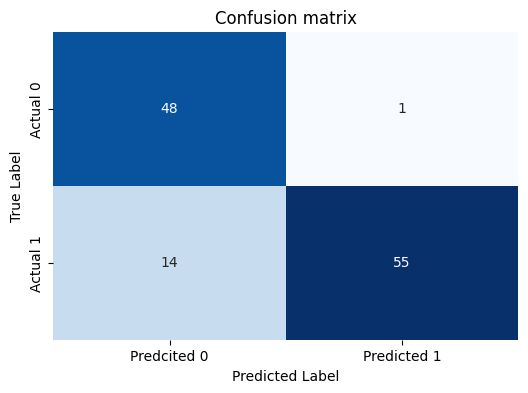

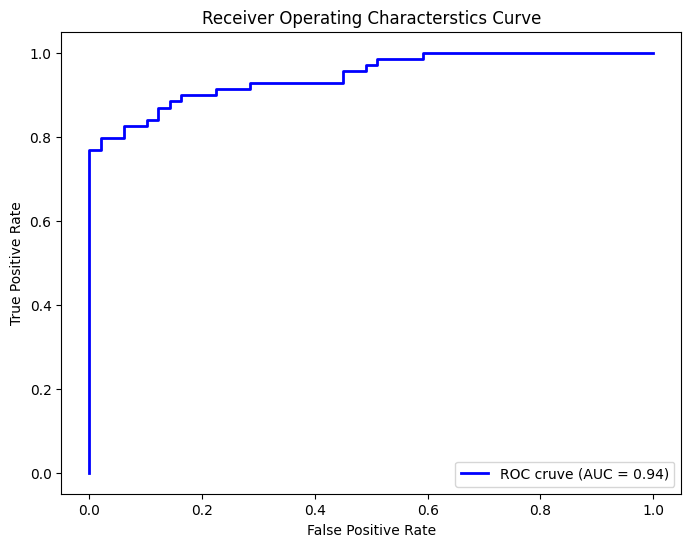

In [61]:
poly_svm = SVC(kernel='poly', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    poly_svm.fit(dataset.X_train, dataset.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = poly_svm.predict(dataset.X_test)
y_score = poly_svm.predict_proba(dataset.X_test)[:,1]


analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)

## 3.3 Own poly SVM results make_moons

Fitting of model of own SVM took 103.29s
Accuracy: 0.88, Sensivity: 0.91, Specifity: 0.85


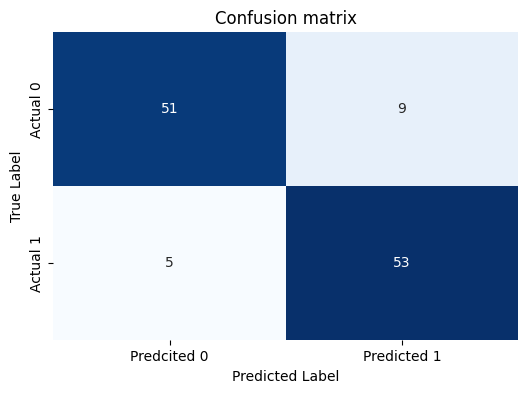

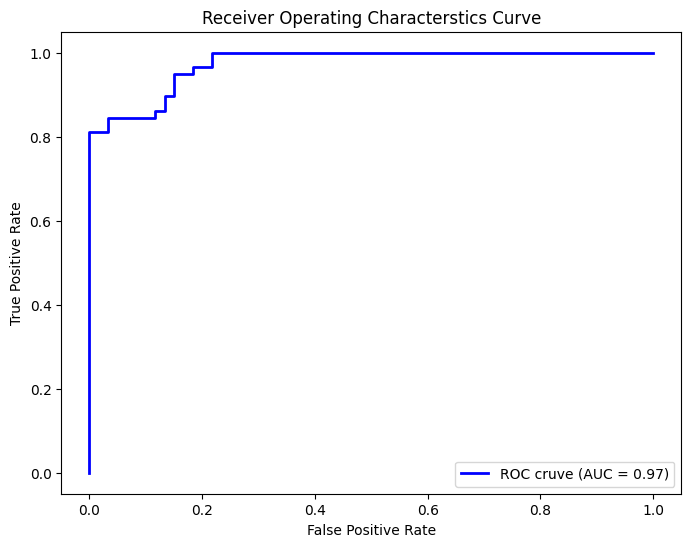

In [62]:
poly_svm = OwnSVM(kernel='poly', degree=3, gamma=0.1, coef0=1)

start_time = time.time()
# for _ in range(100):
poly_svm.fit(dataset_moons.X_train, dataset_moons.y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting of model of own SVM took {elapsed_time:.2f}s")
y_pred = poly_svm.predict(dataset_moons.X_test)
y_score = poly_svm.decision_function(dataset_moons.X_test)
fpr, tpr, thresholds = roc_curve(dataset_moons.y_test, y_score)

poly_analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
poly_analyzer.show_results()
poly_analyzer.confusion_matrix()
poly_analyzer.plot_ROC_curve(y_score)

## 3.4 Sklearn poly SVM results make_moons

Fitting sklearn SVM model took 2.72s
Accuracy: 0.98, Sensivity: 0.98, Specifity: 0.98


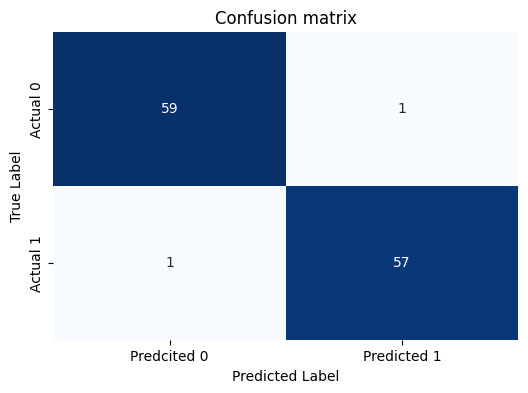

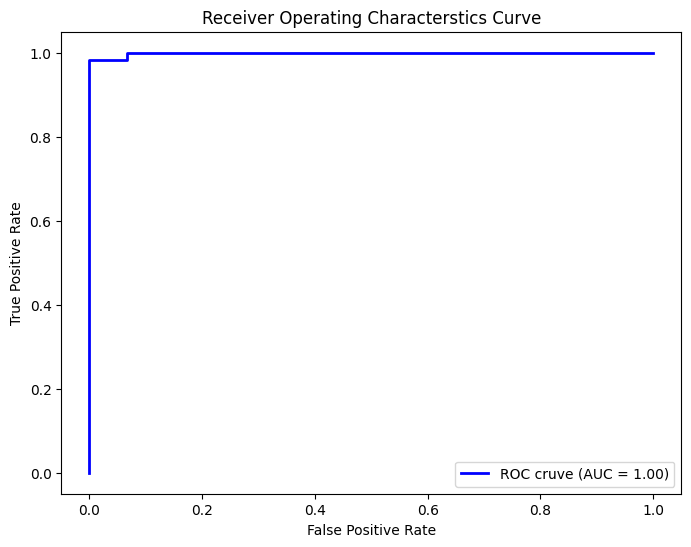

In [63]:
poly_svm = SVC(kernel='poly', probability=True)

# Computing time
start_time = time.time()

for _ in range(100):

    poly_svm.fit(dataset_moons.X_train, dataset_moons.y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Fitting sklearn SVM model took {elapsed_time:.2f}s")

y_pred = poly_svm.predict(dataset_moons.X_test)
y_score = poly_svm.predict_proba(dataset_moons.X_test)[:,1]


analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
analyzer.show_results()
analyzer.confusion_matrix()
analyzer.plot_ROC_curve(y_score)